In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


# **Netflix data with a content-based recommendation system and a wide range of different graphs and visuals.**

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [12]:
netflix_overall=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [15]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_shows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [16]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

# Analysis of Movies vs TV Shows.

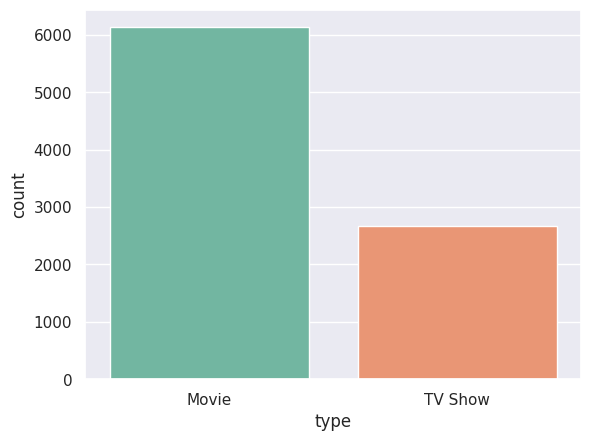

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

# If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

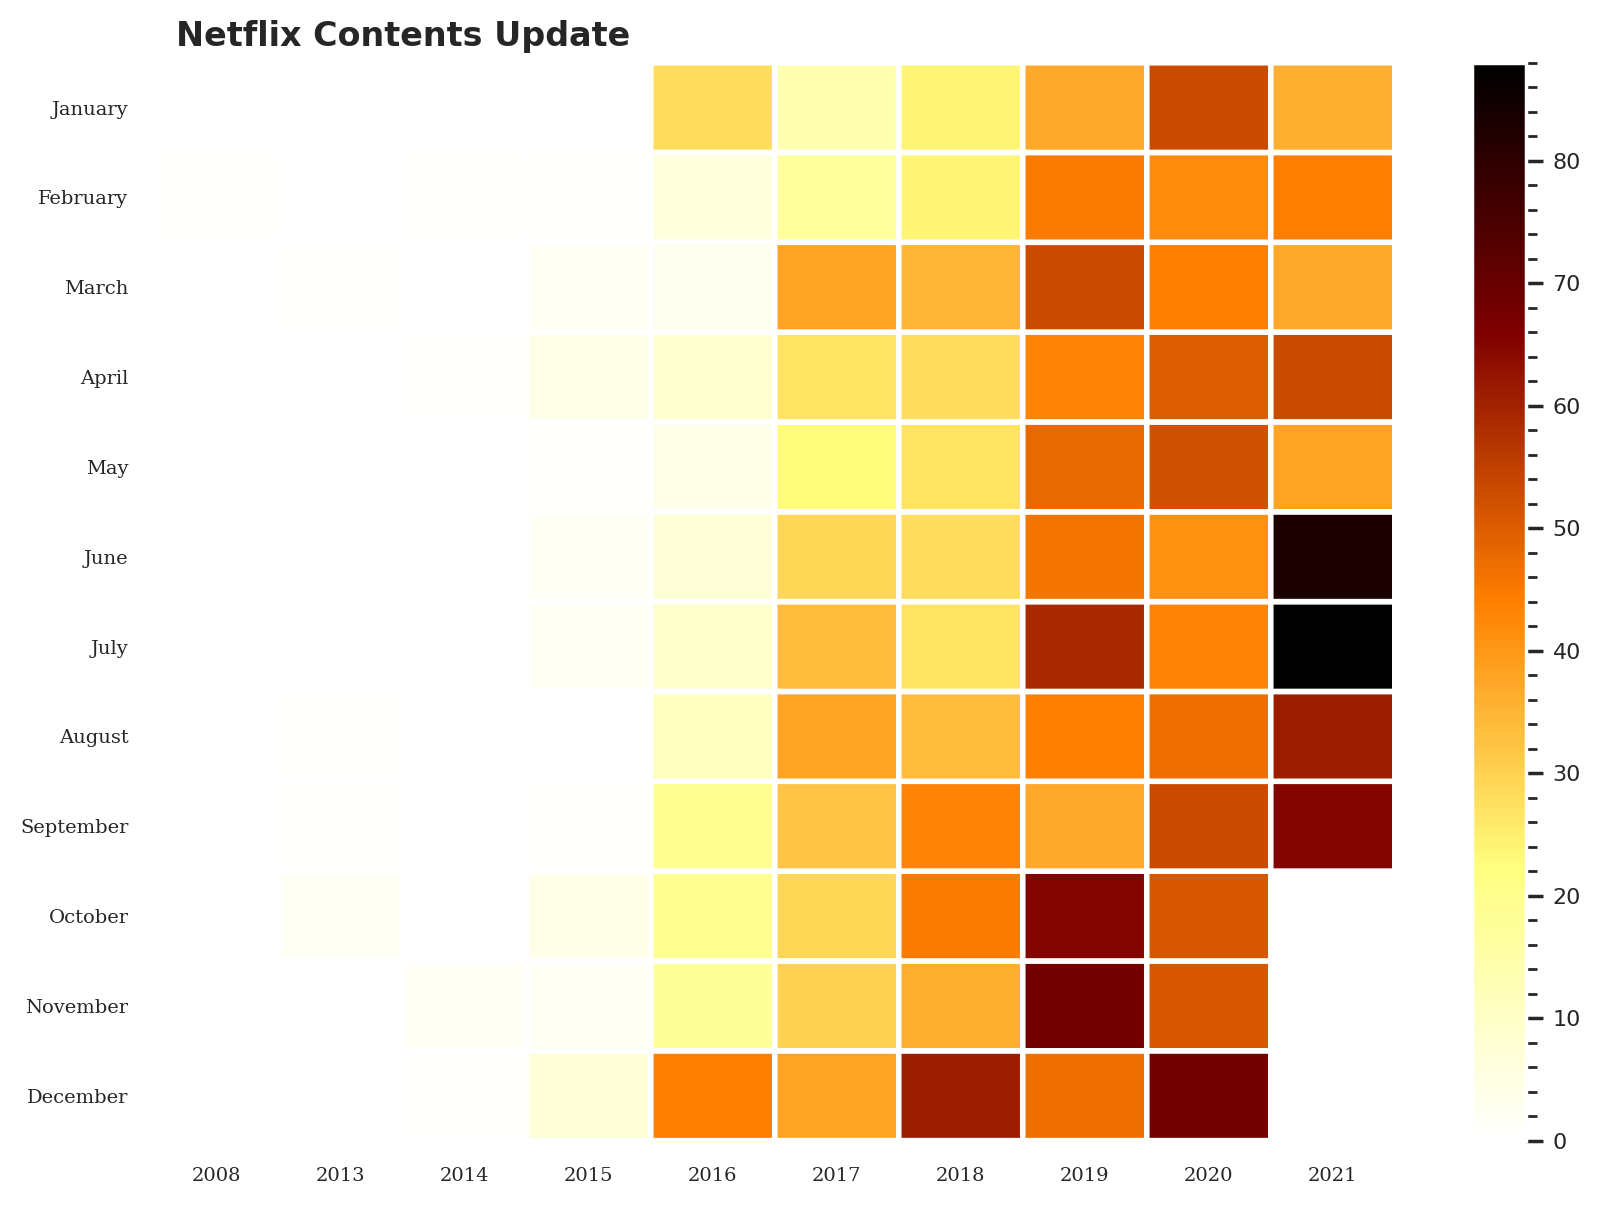

In [20]:

netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()


If the latest year 2021 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

# Movie ratings analysis

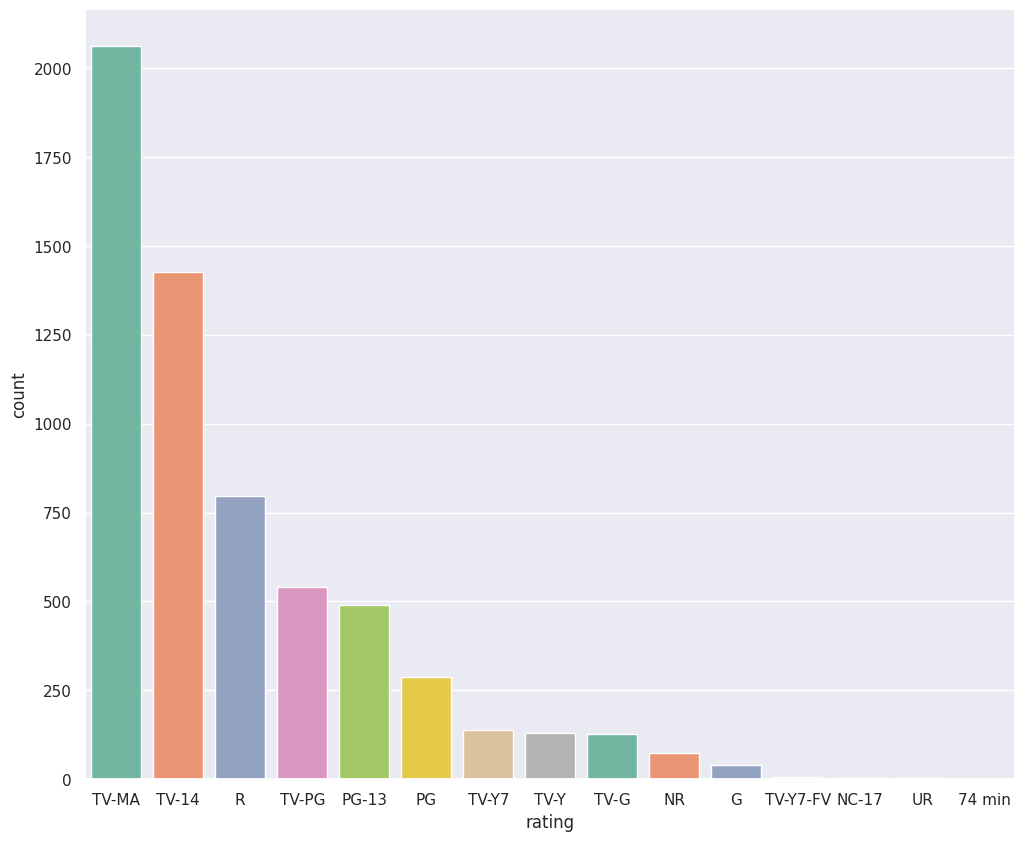

In [24]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the  very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".m

Countries with highest rated content.

In [27]:
country_count=netflix_overall['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


# Year wise analysis

In [28]:
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

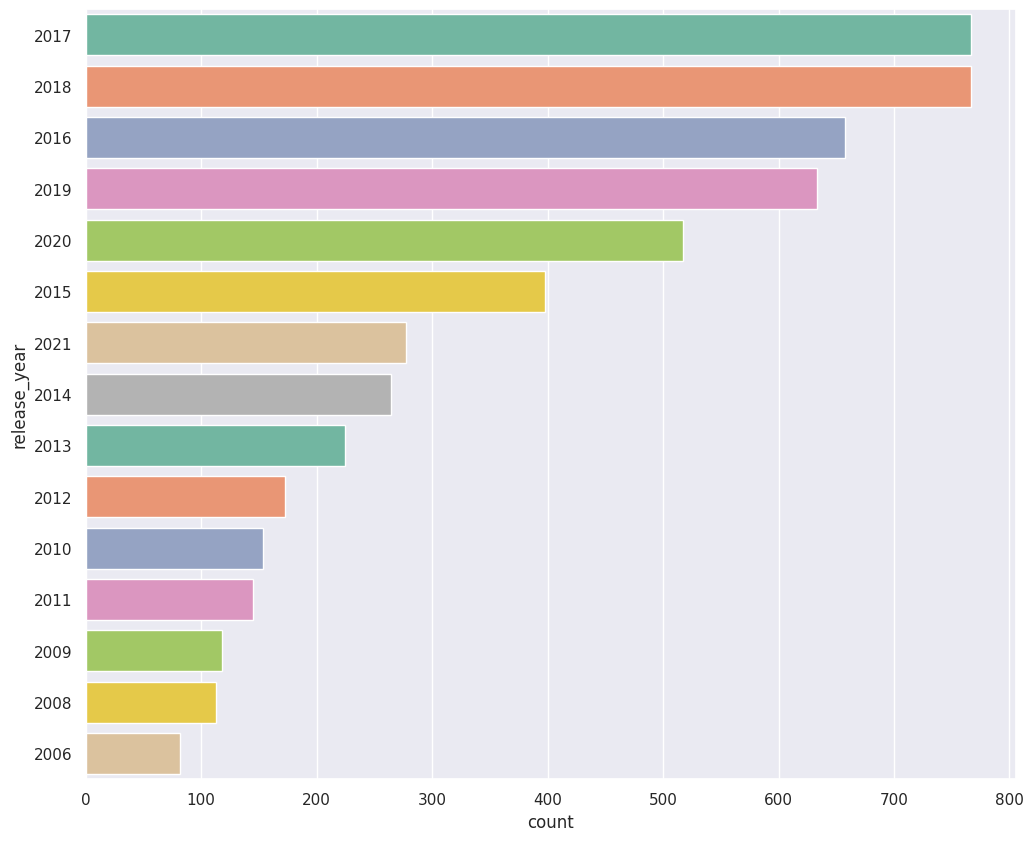

In [29]:

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

In [31]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [36]:
list(countries.items())[10:15]

[(' India', 35),
 (' France', 155),
 ('China', 1),
 (' Canada', 132),
 (' United States', 388)]

In [37]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


In [39]:
list(countries_fin.items())[:5]

[('UnitedStates', 389),
 ('France', 158),
 ('UnitedKingdom', 153),
 ('Canada', 134),
 ('Germany', 107)]

# TOP 10 MOVIE CONTENT CREATING COUNTRIES

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

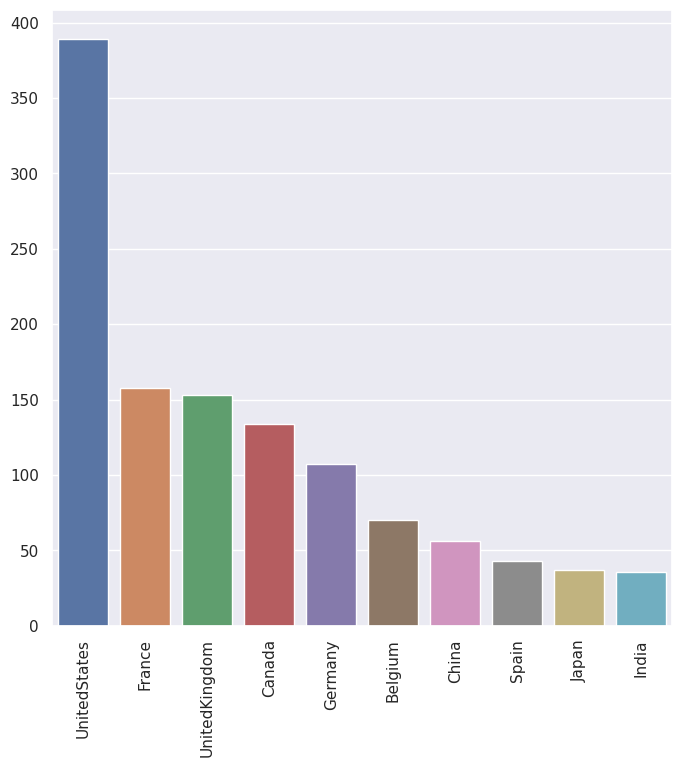

In [40]:

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)


# Analysis of duration of movies

In [45]:
netflix_movies.dropna(subset=["duration"], inplace=True
                     )

In [47]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

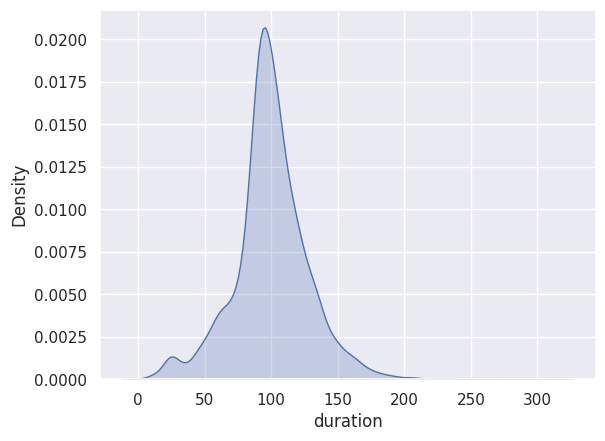

In [48]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting. 

In [49]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# WordCloud for Genres.

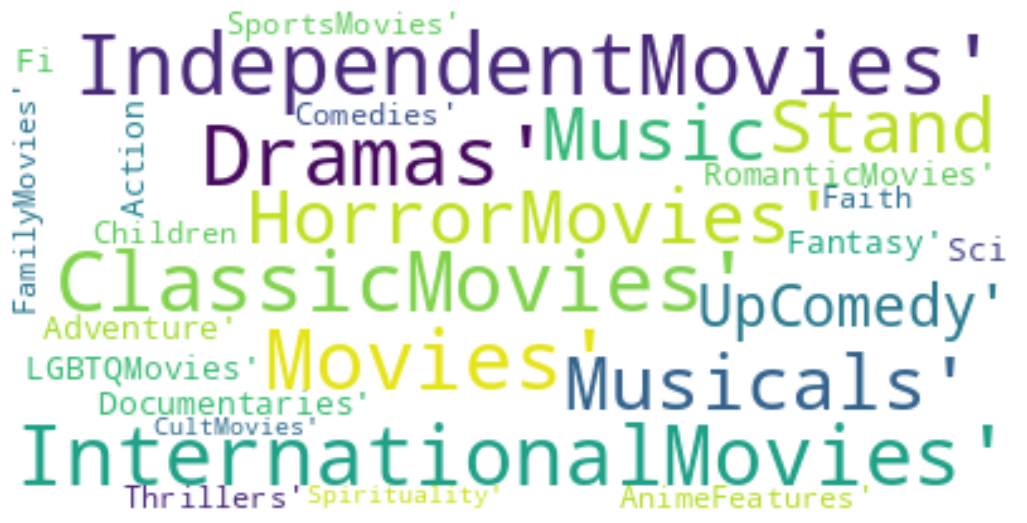

In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
# mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Lollipop plot of Genres vs their count on Netflix

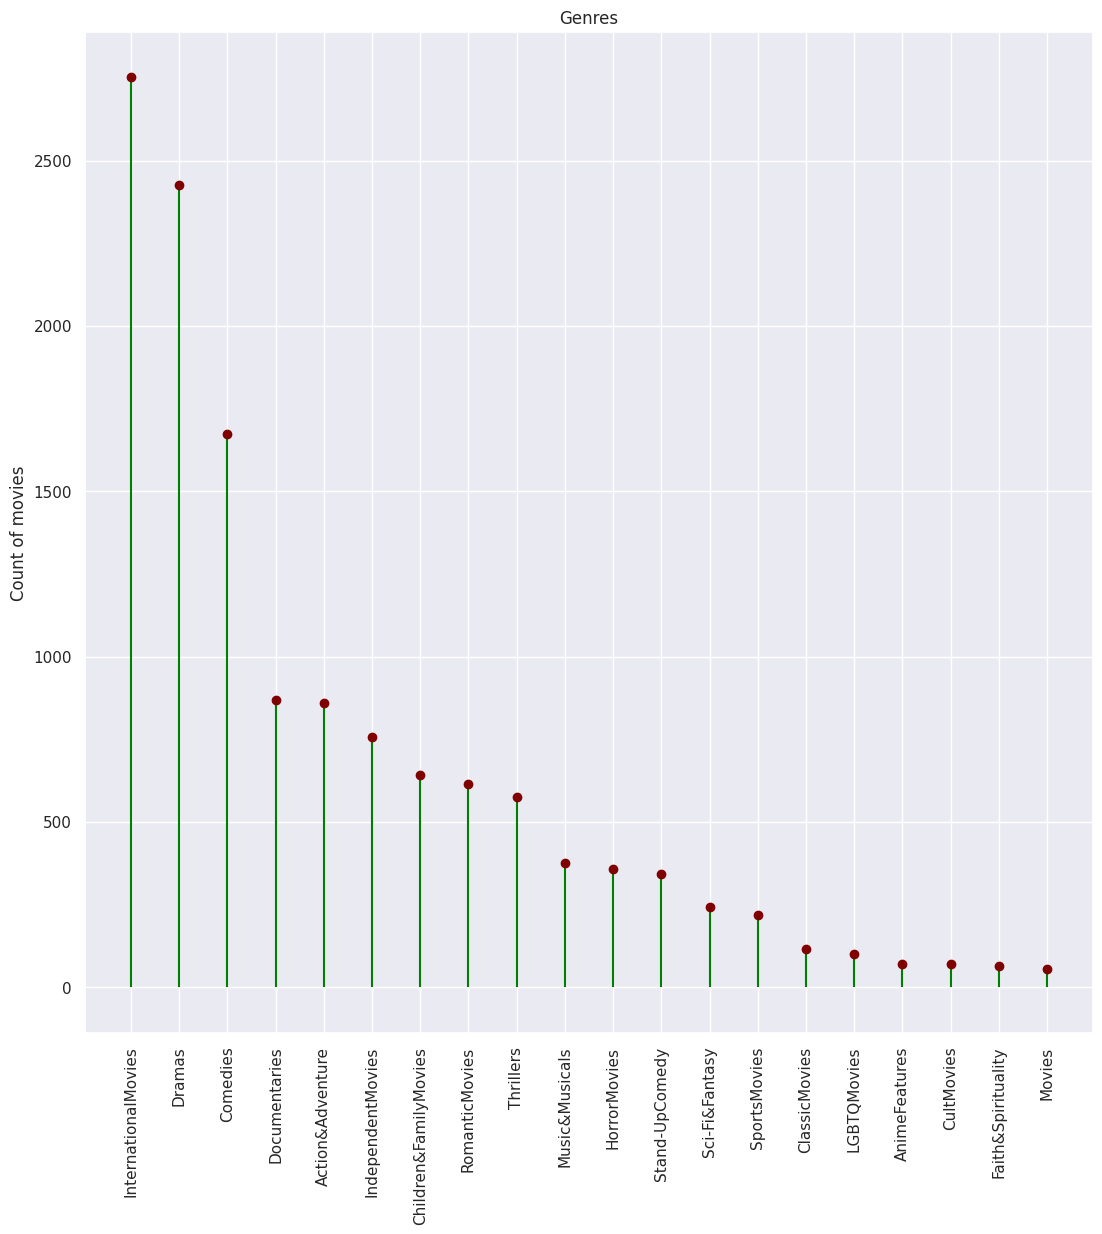

<Figure size 1000x1000 with 0 Axes>

In [53]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

Therefore, it is clear that international movies, dramas and comedies are the top three genres that have the highest amount of content on Netflix.

# Recommendation System (Content Based)

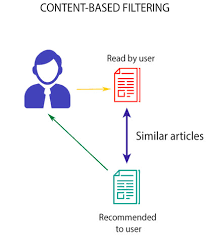

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(8807, 18895)

There are 8807 movies described in 18895 words`

In [57]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [58]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01538292,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02230089],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01538292, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02230089, ..., 0.        , 0.        ,
        1.        ]])

In [59]:

indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [60]:
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [61]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [62]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [64]:
get_recommendations('Kota Factory')

2272                     Drishyam
266          The Creative Indians
2091             The Bridge Curse
4076    She's Dating the Gangster
805                   Racket Boys
2690                       Code 8
1727               Girl's Revenge
8232              The Bye Bye Man
8612            Train of the Dead
2362               The Politician
Name: title, dtype: object

It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

# Content based filtering on multiple metrics

Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

In [72]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [73]:
def clean_data(x):
        return str.lower(x)

In [94]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]
filledna

,title,director,cast,listed_in,description
0,dick johnson is dead,kirsten johnson,,documentaries,"as her father nears the end of his life, filmm..."
1,blood & water,,"ama qamata, khosi ngema, gail mabalane, thaban...","international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...","crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,jailbirds new orleans,,,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,kota factory,,"mayur more, jitendra kumar, ranjan raj, alam k...","international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...
...,...,...,...,...,...
8802,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...","cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
8803,zombie dumb,,,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g..."
8804,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...","comedies, horror movies",looking to survive in a world taken over by zo...
8805,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...","children & family movies, comedies","dragged from civilian life, a former superhero..."


In [75]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,dick johnson is dead,kirsten johnson,,documentaries,"as her father nears the end of his life, filmm..."
1,blood & water,,"ama qamata, khosi ngema, gail mabalane, thaban...","international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."


In [78]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [104]:
filledna['soup'] = filledna.apply(create_soup, axis=1)
filledna.head()





,title,director,cast,listed_in,description,soup
0,dick johnson is dead,kirsten johnson,,documentaries,"as her father nears the end of his life, filmm...",dick johnson is dead kirsten johnson document...
1,blood & water,,"ama qamata, khosi ngema, gail mabalane, thaban...","international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...","blood & water ama qamata, khosi ngema, gail m..."
2,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...","crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,"ganglands julien leclercq sami bouajila, tracy..."
3,jailbirds new orleans,,,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo...","jailbirds new orleans docuseries, reality tv..."
4,kota factory,,"mayur more, jitendra kumar, ranjan raj, alam k...","international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...,"kota factory mayur more, jitendra kumar, ranj..."


In [103]:
filledna.soup[0]

'dick johnson is dead kirsten johnson  documentaries as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [81]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [89]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [90]:
get_recommendations_new('PK', cosine_sim2)

1114            3 Idiots
3131      Dil Chahta Hai
1022    Taare Zameen Par
4507               Sanju
7119              Janaan
5718     Mumbai Cha Raja
7590            No Entry
1441       Hello Brother
1019              Lagaan
3132     Dil Dhadakne Do
Name: title, dtype: object

In [91]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

4809                  Kiss Me First
5032    The Frankenstein Chronicles
6922                   Happy Valley
3034                    Giri / Haji
2184                       Get Even
5716                       Paranoid
7333                     London Spy
3789                 Killer Ratings
5278                        Apaches
1991                   Criminal: UK
Name: title, dtype: object

In [93]:
get_recommendations("kota factory", cosine_sim2)

1038                      Dancing Angels
7438    Melodies of Life - Born This Way
2982                       Find Yourself
3293                       Little Things
1093                         The Big Day
7918                      Sadqay Tumhare
3463                     College Romance
366                              Glow Up
2736                     Man Like Mobeen
2101         Baewatch: Parental Guidance
Name: title, dtype: object

## More accurate recommandation